# Midterm Project
[Project Guidelines: Summer Academy NPS Data](https://docs.google.com/document/d/11v_d1bkFbTM4N3WU6JAbdR_9_eUChrN32-mdQ9zKaOw/preview)

### Important Links
- [Exploratory Data Analysis in Pandas](https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)

In [504]:
# Pandas is a library for basic data analysis
import pandas as pd

# NumPy is a library for advanced mathematical computation
import numpy as np

# MatPlotLib is a library for basic data visualization
import matplotlib.pyplot as plt

# SeaBorn is a library for advanced data visualization
import seaborn as sns

FILEPATH = "survey_midterm_datasets/2017/Student Feedback Surveys-Superview.csv"
df = pd.read_csv(FILEPATH)
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


## Description of Problem
Clean and investigate Make School NPS data to find interesting and actionable trends that help inform decision-makers. Create a presentation in a Jupyter Notebook using data visualizations and other techniques that allow non-technical team members to understand your findings. 

### 1. Analyze Dataset

In [505]:
def analyze_dataset(df):
    print("\n------------------------------\nINFO\n------------------------------")
    df.info() #info of datasets: (range), column's (count, names, non-null counts, data types), memory usage
    print("\n------------------------------\nCOLUMN'S UNIQUE VALUES COUNT\n------------------------------")
    print(df.nunique()) #check how many unique values each columns has
    # df["Rating (Num)"].value_counts() #check what those unique values in the columns are and their counts
    print("\n------------------------------\nCOLUMNS\n------------------------------")
    for i, column_name in enumerate(df.columns):
        print(f"\nColumn #{i}: {column_name}")
        print(df.T.stack()[column_name].value_counts())
# analyze_dataset(df)

### 2. Clean Dataset

### 2a. Specify Proper Data Types

In [506]:
# ------------------------------
# COLUMN'S UNIQUE VALUES COUNT
# ------------------------------
# ID                 1453
# Location             12
# Track                 5
# Week                  8
# Rating (Num)         11
# Schedule Pacing       5

df['Location'] = df['Location'].astype(str) #convert column's values to string
df['Track'] = df['Track'].astype(str)
df['Week'] = df['Week'].astype(str)
df['Rating (Num)'] = df['Rating (Num)'].astype(str)
df['Schedule Pacing'] = df['Schedule Pacing'].astype(str)

print("Note Info's 'non-null' increased because nan values began showing")
# analyze_dataset(df)

Note Info's 'non-null' increased because nan values began showing


### 2b. Specify Values that should be converted to NaN

In [507]:
# df = pd.read_csv("train.csv", usecols= ["PassengerId", "Survived", "Pclass"])  #only use columns we want
# df = pd.read_csv(FILEPATH, skiprows = 1, na_values = ['no info', '.']) #skip rows

df = pd.read_csv(FILEPATH, na_values = ['#ERROR!', "nan"]) #columns that has strings in na_values will be converted to NaN
# analyze_dataset(df)

### 2c. Fix row values
- **Apply once** - change Week values to Int ```Week 1``` --> ```1```

In [508]:
# Changed 'Week' values from str to Int
# df['Week'] = df.apply(lambda x: int(x['Week'].replace('Week ', '')),axis=1) #change weeks values Week 1, to just 1; turning it to an int
df['Week'].value_counts()

Week 1    288
Week 2    277
Week 3    243
Week 4    193
Week 5    179
Week 6    144
Week 7    120
Week 8      9
Name: Week, dtype: int64

### 3. Begin Data Analysis

#### Background on NPS
Every summer, Make School welcomes hundreds of students into the Summer Academy to study software development and build cool stuff. The management wants to make sure that students continue to be satisfied with their experience as the program scales. The main way we measure this is through **Net Promoter Score (NPS), which is a tool commonly used to measure customer loyalty and promotion**. You’ve seen NPS before if you’ve been asked a question like:
“On a scale of 1 to 10, how likely are you to recommend [X] to a friend or colleague?”

NPS segments all responses between 1 and 10 into three categories based on their sentiment:
- Promoter (9 – 10)
- Passive (7 – 8)
- Detractor (1 – 6)

#### To calculate NPS, companies follow these steps:
1. Segment all responses into Promoter, Passive, and Detractor categories.
2. Calculate the percentage of responses in each category out of the total number of responses to the survey.
3. Subtract the Detractors percentage from the Promoters percentage. This is the NPS.

```NPS = (Promoters - Detractors)  (Promoters + Passives + Detractors)```


### How I created an "NPS Category" column

In [509]:
def get_nps_category(rating):
    if rating >= 9:
        return "Promoter"
    elif rating >= 7:
        return "Passive"
    else:
        return "Detractor" 

# Create another column named "NPS Category" with values of either Promoter, Passive, Detractor, based on their rating
df["NPS Category"] = df.apply(lambda row: get_nps_category(row["Rating (Num)"]), axis=1)
df.tail()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,NPS Category
1448,1495,New York City,"Apps, Explorer",Week 7,10.0,Just right,Promoter
1449,1496,New York City,"Apps, Explorer",Week 7,8.0,Just right,Passive
1450,1497,New York City,Apps,Week 7,10.0,Just right,Promoter
1451,1498,New York City,"Apps, Explorer",Week 7,1.0,A little too slow,Detractor
1452,1499,New York City,Apps,Week 5,8.0,Just right,Passive


### How I calculated 'Promoter', 'Passive', 'Detractor'

In [510]:
# Promoters = 9-10
promoters = df[df['NPS Category'].dropna() == 'Promoter']
len(promoters) / len(df['NPS Category'].dropna())

0.5230557467309016

In [511]:
# Passive = 7-8
passives = df[df['NPS Category'].dropna() == 'Passive']
len(passives) / len(df['NPS Category'].dropna())

0.39160357880247765

In [512]:
# Detractor = 1-6
detractors = df[df['NPS Category'].dropna() == 'Detractor']
len(detractors) / len(df['NPS Category'].dropna())

0.08534067446662079

In [513]:
# NPS = (Promoters - Detractors) / (Promoters + Passives + Detractors)
# NPS = 639 / 1450 * 100
NPS = (len(promoters) - len(detractors)) / (len(promoters) + len(passives) + len(detractors)) * 100
NPS

43.77150722642808

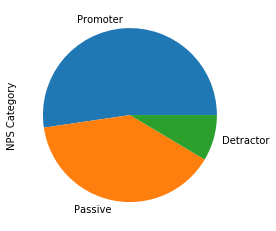

In [514]:
df['NPS Category'].dropna().value_counts().plot(kind='pie')

## Questions to Consider Answering
In this scenario, you’ve just been given access to this data from your boss, with the instructions to “See if you can find anything in here that can help the business.” – This is a very broad set of instructions.  In order to complete this task well, you may want to consider finding answers to the following questions:

- How many more promoters are there than detractors across our 2017 data?
- Which track boasts the best promoter-to-detractor ratio?
- Does the student experience get better the longer that they are enrolled at the Summer Academy?
- Does student satisfaction vary by location?
- What are things we could find here that could “help the business”?
- What sorts of information does this dataset contain?
- What kinds of questions might we be able to answer with this data?
- What kinds of questions can’t we answer with this data?
- What sorts of information might be actionable?
- How can you present your findings in a way that non-technical employees can understand and use to make decisions?

### Data Wrangling Issues to Consider
- CSV files may have header rows
- Collating data from multiple sources
- Introducing new columns/attributes
- Converting data types (string values to integers)
- Converting categorical values (either to integers or one-hot encoding)
- Normalizing values based on different units


## Q1. Whick track are popular/chosen?

### Create "Actual Track" column
Students with "Tracks" like "Apps, Explorer" and "Games, Explorer" will have an actual track of "Apps" or "Games"

In [515]:
df["Actual Track"] = df.apply(lambda row: get_actual_track(row["Track"]), axis=1)

def get_actual_track(track):
    '''takes a track and strips "Explorer"'''
    if track == "Apps" or track == "Games" or track == "VR":
        return track
    elif track == "Apps, Explorer" or track == "Games, Explorer":
        multiple_tracks = track.split(", ") #split multiple tracks; e.g. Apps, Explorer = Apps
        track = multiple_tracks[0]
        return track
    else: #handle nan values
        return None
    
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,NPS Category,Actual Track
0,134,San Francisco,"Apps, Explorer",Week 1,3.0,Just right,Detractor,Apps
1,36,Los Angeles,Apps,Week 1,4.0,A little too fast,Detractor,Apps
2,117,San Francisco,Games,Week 1,4.0,Way too slow,Detractor,Games
3,253,NaN,NaN,Week 2,4.0,A little too fast,Detractor,None
4,350,New York City,"Apps, Explorer",Week 1,4.0,Just right,Detractor,Apps


In [516]:
track_dict = dict(df['Track'].value_counts())
track_dict
new_track_dict = {}
#Turn Explorers to one of the tracks
for key, value in track_dict.items(): #for each key and values in dic
    print(key,value)
    if key == "Apps" or key == "Games" or key == "VR":
        new_track_dict[key] = new_track_dict.get(key, 0) + value #use dict's get() to get current count and increment by value
    else:
        multiple_tracks = key.split(", ") #split multiple tracks; e.g. Apps, Explorer = Apps
        for track in multiple_tracks:
            if track == "Explorer": #ignore Explorers
                continue
            new_track_dict[track] = new_track_dict.get(track, 0) + value #increment track's value

print("\nPython\n", new_track_dict)
print("\nPandas:\n", df["Actual Track"].value_counts())

Apps 871
Apps, Explorer 224
Games 208
VR 60
Games, Explorer 43

Python
 {'Apps': 1095, 'Games': 251, 'VR': 60}

Pandas:
 Apps     1095
Games     251
VR         60
Name: Actual Track, dtype: int64


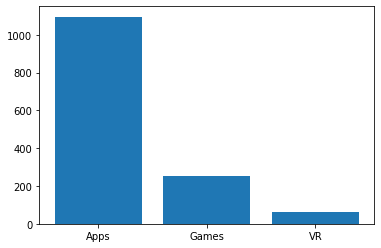

In [517]:
plt.bar(range(len(new_track_dict)), new_track_dict.values(), align='center')
plt.xticks(range(len(new_track_dict)), list(new_track_dict.keys()))
plt.show()

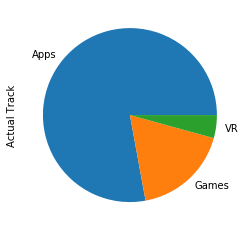

In [518]:
df['Actual Track'].dropna().value_counts().plot(kind='pie')

In [519]:
students_count = len(df['Actual Track'].dropna())
for track in df['Actual Track'].dropna().unique(): #loop through each unique values of track excluding None
    students_on_track = df[df['Actual Track'] == track] #get students at this track
    print(f"Track {track}: {(len(students_on_track) / students_count * 100)}") #get percentage
    print(len(students_on_track))
students_count

Track Apps: 77.88051209103841
1095
Track Games: 17.852062588904694
251
Track VR: 4.267425320056899
60


1406

##### Answer:
- **77.9%** students chose *Apps*
- **17.9%** students chose *Games*
- **4.3%** students chose *VR*

## Q2. Which track boasts the best promoter-to-detractor ratio?

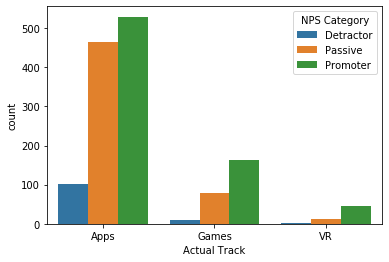

In [520]:
sns.countplot(x='Actual Track', hue="NPS Category", data=df)

### Conditional Probability
https://github.com/Make-School-Courses/DS-1.1-Data-Analysis/blob/master/Notebooks/Applied_Probability.ipynb

In [521]:
#method that takes a Column name and that column's value, and return conditional probabililty of column2
def conditional_prob(df, column1, value1, column2):
    probabilities = {}
#     column1_is_value1 = df[df[column1] == value1]
    column2_values = set(df[column2].values) #possible values for target_column
    for column2_value in column2_values: #for each value in target's values
        probabilities[column2_value] = len(df[ (df[column1] == value1) & (df[column2] == column2_value)]) / len(df[df[column1] == value1])
    return probabilities

In [522]:
for track in df['Actual Track'].dropna().unique(): #loop through each unique values in "Actual Track"
    print(track)
    print(conditional_prob(df, "Actual Track", track, "NPS Category")) #get the probability 

Apps
{'Detractor': 0.09315068493150686, 'Passive': 0.4237442922374429, 'Promoter': 0.4831050228310502}
Games
{'Detractor': 0.035856573705179286, 'Passive': 0.3107569721115538, 'Promoter': 0.6533864541832669}
VR
{'Detractor': 0.03333333333333333, 'Passive': 0.2, 'Promoter': 0.7666666666666667}


 ### Conditional Probability with Pie Chart

In [523]:
#get conditional probability and graph of column2 base on column1's value1
def graph_conditional_prob(df, column1, value1, column2):
    probabilities = {}
    column1_is_value1 = df[df[column1] == value1] #all column1 == value1
    column2_values = set(df[column2].values) #possible values for target_column #Names
    column2_names = []
    column2_percents = []
    column2_explode = [] #explode the biggest percent
    for column2_value in column2_values: #for each value in target's values
        column2_names.append(column2_value) #append name
        #get column2's percent
        c2_percent = len(df[ (df[column1] == value1) & (df[column2] == column2_value)]) / len(df[df[column1] == value1])
        column2_percents.append(c2_percent)
        probabilities[column2_value] = c2_percent
    max_value = max(column2_percents) #get max value that we will explode
    max_index = column2_percents.index(max_value) #get max_value's index
    for i in range(len(column2_percents)): #populate column2_explode
        if i == max_index: #explode the index with max value
            column2_explode.append(0.1)
            continue
        column2_explode.append(0)
    #Begin plotting
    fig1, ax1 = plt.subplots()
    ax1.pie(column2_percents, explode=column2_explode, labels=column2_names, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(column1+": "+value1+" ("+str(len(column1_is_value1))+")") #assign plot's title
    plt.show()
    return probabilities

### Graph Percentage of "Promoter", "Passive", and "Detractor" in each Track

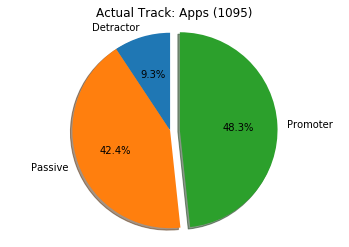

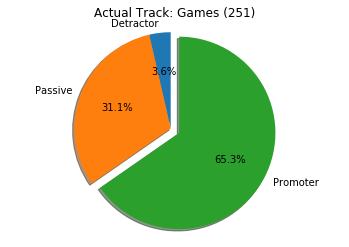

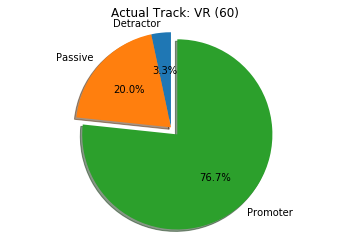

In [524]:
for track in df["Actual Track"].dropna().unique():
    graph_conditional_prob(df, "Actual Track", track, "NPS Category")

##### Answer
- VR track has the highest ratio of Promoter despite of having the least amount of enrolled students

##### Assumption
- Maybe having too much students in a track reduces the likeliness that a student becomes a Promoter

## Q3. Does student satisfaction vary by location?

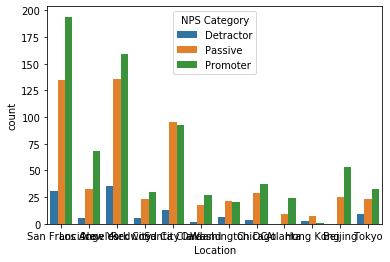

In [525]:
#Hard to see
sns.countplot(x='Location', hue="NPS Category", data=df)

### Introducing .isin() 
We can **pass a list** of locations (e.g. San Francisco and Los Angeles) in ```isin()``` function of DataFrame which returns True for each entry in ‘Location‘ column that matches with any entry in given list.

In [531]:
df[df['Location'].isin(['San Francisco', 'Los Angeles', 'Redwood City', 'Santa Clara', 'Oakland'])]

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,NPS Category,Actual Track
0,134,San Francisco,"Apps, Explorer",Week 1,3.0,Just right,Detractor,Apps
1,36,Los Angeles,Apps,Week 1,4.0,A little too fast,Detractor,Apps
2,117,San Francisco,Games,Week 1,4.0,Way too slow,Detractor,Games
5,23,Redwood City,Apps,Week 1,5.0,Just right,Detractor,Apps
6,28,Los Angeles,Apps,Week 7,5.0,Just right,Detractor,Apps
...,...,...,...,...,...,...,...,...
1398,1445,Los Angeles,Apps,Week 8,10.0,Just right,Promoter,Apps
1399,1446,Los Angeles,Games,Week 8,9.0,A little too slow,Promoter,Games
1400,1447,Los Angeles,Apps,Week 8,10.0,Just right,Promoter,Apps
1415,1462,Los Angeles,Apps,Week 8,10.0,A little too fast,Promoter,Apps


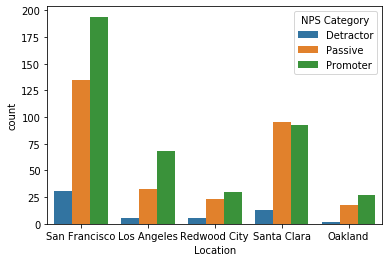

In [527]:
sns.countplot(x='Location', hue="NPS Category", data=df[df['Location'].isin(['San Francisco', 'Los Angeles', 'Redwood City', 'Santa Clara', 'Oakland'])])

In [534]:
# Pie Chart for each CA Location
# ca_location = df[df['Location'].isin(['San Francisco', 'Los Angeles', 'Redwood City', 'Santa Clara', 'Oakland'])]
# for location in ca_location["Location"].dropna().unique():
#     graph_conditional_prob(ca_location, "Location", location, "NPS Category")

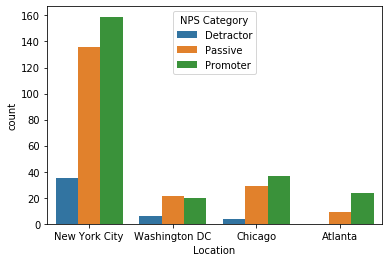

In [545]:
out_of_state_plot = sns.countplot(x='Location', hue="NPS Category", data=df[df['Location'].isin(['New York City', 'Chicago', 'Washington DC', 'Atlanta'])])
out_of_state_plot.set()

In [544]:
df['Location'].value_counts()

San Francisco    360
New York City    330
Santa Clara      201
Los Angeles      106
Beijing           78
Chicago           70
Tokyo             65
Redwood City      58
Washington DC     47
Oakland           47
Atlanta           33
Hong Kong         11
Name: Location, dtype: int64

In [484]:
# What kinds of questions might we be able to answer with this data?
# What kinds of questions can’t we answer with this data?
# What sorts of information might be actionable?

In [ ]:
df = pd.DataFrame(dict(x=np.random.poisson(4, 500)))
ax = sns.barplot(x="x", y="x", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")